In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, top_k_accuracy_score

In [2]:
# Import dataset and split between train and test sets
df = pd.read_csv('all_weather_data.csv')
dfX = df.drop('weather_description', axis=1).values
dfY = df['weather_description'].values
trainX, testX, trainY, testY = train_test_split(dfX, dfY, test_size=0.2)
print(df)

            Hour       Day     Month  Year  humidity  pressure  temperature  \
0       0.391304  0.466667  0.818182   0.4  0.591259  0.282649     0.414975   
1       0.739130  0.900000  1.000000   0.8 -1.672953 -0.185786    -0.881335   
2       1.000000  0.533333  1.000000   0.0  0.837369 -0.107713    -1.774599   
3       0.956522  0.133333  1.000000   0.4  0.738925  0.985300     0.267316   
4       0.260870  0.533333  0.909091   0.8  1.231146 -0.185786     0.293124   
...          ...       ...       ...   ...       ...       ...          ...   
119995  0.130435  0.600000  0.727273   0.2  0.049817 -0.107713     0.306340   
119996  0.434783  0.800000  0.363636   0.4  0.738925 -0.107713    -0.258019   
119997  0.391304  0.633333  0.454545   0.4  0.591259  0.204576     0.206407   
119998  0.260870  0.333333  0.454545   0.2  0.738925 -0.185786     0.699920   
119999  0.652174  0.200000  0.909091   0.0  0.886592  0.048432     0.084102   

        weather_description  wind_direction  wind_s

In [14]:
# Create and test KNN classifiers with different number of neighbors
predYs = []
predProbYs = []
for neighbors in range(25, 75, 5):
    knnClassifier = KNeighborsClassifier(n_neighbors=neighbors)
    knnClassifier.fit(trainX, trainY)    
    predY = knnClassifier.predict(testX)
    predProbY = knnClassifier.predict_proba(testX)
    predYs.append(predY)
    predProbYs.append(predProbY)

In [15]:
# Evaluate results
top3Error = []
for i in range(len(predYs)):
    print("num neighbors:", 5*i+25)
    print(classification_report(testY, predYs[i]))
    print("Top 2 Error:", top_k_accuracy_score(testY, predProbYs[i], k=2))
    print("Top 3 Error:", top_k_accuracy_score(testY, predProbYs[i], k=3))
    print("Top 4 Error:", top_k_accuracy_score(testY, predProbYs[i], k=4))
    top3Error.append(top_k_accuracy_score(testY, predProbYs[i], k=3))

num neighbors: 25
              precision    recall  f1-score   support

           0       0.29      0.30      0.30      1955
           1       0.26      0.26      0.26      2006
           2       0.26      0.28      0.27      2007
           3       0.39      0.56      0.46      1961
           4       0.21      0.16      0.18      2029
           5       0.55      0.89      0.68      2026
           6       0.24      0.13      0.17      1945
           7       0.29      0.29      0.29      2027
           8       0.41      0.45      0.43      1981
           9       0.23      0.16      0.19      1998
          10       0.50      0.56      0.53      2009
          11       0.24      0.14      0.17      2056

    accuracy                           0.35     24000
   macro avg       0.32      0.35      0.33     24000
weighted avg       0.32      0.35      0.33     24000

Top 2 Error: 0.5224166666666666
Top 3 Error: 0.639
Top 4 Error: 0.727375
num neighbors: 30
              precision 

num neighbors: 70
              precision    recall  f1-score   support

           0       0.28      0.26      0.27      1955
           1       0.26      0.23      0.25      2006
           2       0.26      0.28      0.27      2007
           3       0.37      0.56      0.45      1961
           4       0.22      0.13      0.16      2029
           5       0.52      0.90      0.66      2026
           6       0.22      0.11      0.14      1945
           7       0.28      0.32      0.30      2027
           8       0.39      0.47      0.43      1981
           9       0.23      0.15      0.18      1998
          10       0.46      0.55      0.50      2009
          11       0.24      0.14      0.18      2056

    accuracy                           0.34     24000
   macro avg       0.31      0.34      0.32     24000
weighted avg       0.31      0.34      0.32     24000

Top 2 Error: 0.5212916666666667
Top 3 Error: 0.6431666666666667
Top 4 Error: 0.7355


Text(0.5, 1.0, 'Top 3 Error Rate for K=25-75')

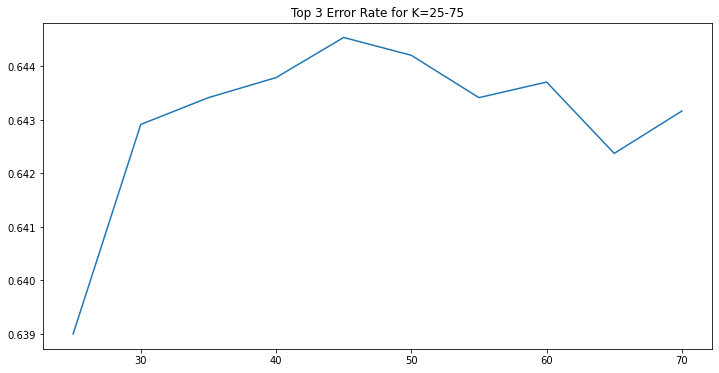

In [16]:
# Plot Top 3 Error for K=300-324
plt.figure(figsize=(12, 6))
plt.plot(range(25, 75, 5), top3Error)
plt.title('Top 3 Error Rate for K=25-75')
